In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from mpl_toolkits.basemap import Basemap
import plotly.tools as tls
import time
import warnings
warnings.filterwarnings('ignore')

In [12]:
terror_data = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='ISO-8859-1',
                          usecols=[0, 1, 2, 3, 8,9, 10,11, 13, 14, 35, 84, 100, 103])
terror_data = terror_data.rename(
    columns={'eventid':'id', 'iyear':'year', 'imonth':'month', 'iday':'day',
             'country_txt':'country', 'provstate':'state', 'targtype1_txt':'target',
             'weaptype1_txt':'weapon', 'nkill':'fatalities', 'nwound':'injuries'})

terror_data = terror_data[np.isfinite(terror_data.latitude)]
terror_data = terror_data.sort_values(['country'], ascending = False)

# Terrorism attacks in Europe

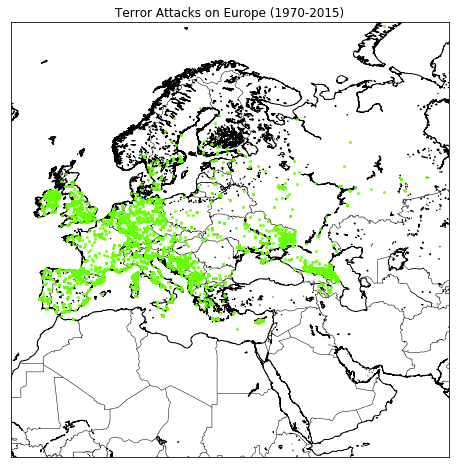

In [13]:
plt.figure(figsize=(15,8))
europe = terror_data[terror_data["region_txt"].isin(["Eastern Europe", "Western Europe"])]

EU = Basemap(projection='mill', llcrnrlat = 10, urcrnrlat = 75, llcrnrlon = -15, urcrnrlon = 70, resolution = 'h')
EU.drawcoastlines()
EU.drawcountries()
EU.drawstates()

x, y = EU(list(europe["longitude"].astype("float")), list(europe["latitude"].astype(float)))
EU.plot(x, y, "go", markersize = 2, alpha = 0.8, color = "#66FF00")

plt.title('Terror Attacks on Europe (1970-2015)')
plt.show()

# Type of weapon

In [14]:
#not working
#weaptype = terror_data[terror_data["region_txt"]=='Western Europe'].groupby('weapon').size().order(ascending=False).head(10).to_frame(name = 'count').reset_index()

#weaptype

# Terrorist attacks in Italy

In [15]:
# These coordinates form the bounding box of Italy
bot, top, left, right = 6.07, 19.24, 36.20, 47.86 # just to zoom in to only Italy
italy_map = Basemap(projection='merc', resolution='l',    llcrnrlat=left,    llcrnrlon=bot,    urcrnrlat=right,    urcrnrlon=top)
italy = terror_data[terror_data["country"] == "Italy"]
x, y = italy_map(list(italy["longitude"].astype("float")), list(italy["latitude"].astype(float)))

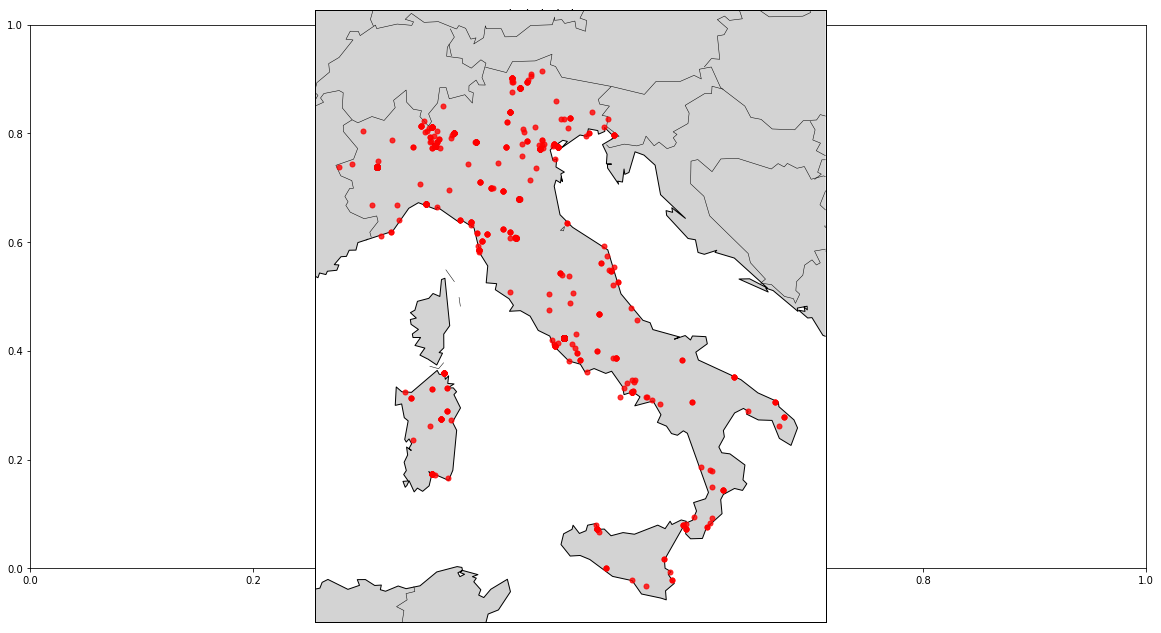

In [16]:
fig = plt.figure(figsize=(20,10))  # predefined figure size, change to your liking. 
plt.title('Terror Attacks in italy by Weapon Type 1970-2015')
# But doesn't matter if you save to any vector graphics format though (e.g. pdf)
ax = fig.add_axes([0.05,0.05,0.9,0.85])

# add county shapes from http://www.gadm.org/download
#italy_map.readshapefile('data/shape_files/DEU_adm1', 'DEU_adm0', drawbounds=True)  # plots the state boundaries, read explanation below code
italy_map.drawcoastlines()
italy_map.drawcountries()
italy_map.drawstates()
italy_map.drawmapboundary()
italy_map.fillcontinents(color='lightgray')

italy_map.plot(x,y,'.', markersize = 10, alpha = 0.8, color = "#FF0000")

In [17]:
#weaptype = terror_data[terror_data["country"]=='Italy'].groupby('weaptype4').size().order(ascending=False).head(10).to_frame(name = 'count').reset_index()

#weaptype